In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import preprocessing
import seaborn as sns

from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split

In [23]:
books_data = preprocessing.load_books_rating_data(100000)
books_data

,score,text
0,4.0,This is only for Julie Strain fans. It's a col...
1,5.0,I don't care much for Dr. Seuss but after read...
2,5.0,"If people become the books they read and if ""t..."
3,4.0,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,4.0,Philip Nel - Dr. Seuss: American IconThis is b...
...,...,...
99995,3.0,I somewhat liked april morning. It was a quick...
99996,3.0,I somewhat liked april morning. It was a quick...
99997,4.0,I enjoyed this book very much. Although it was...
99998,3.0,"I have read the novel, April Morning, and i fo..."


<AxesSubplot: xlabel='score', ylabel='count'>

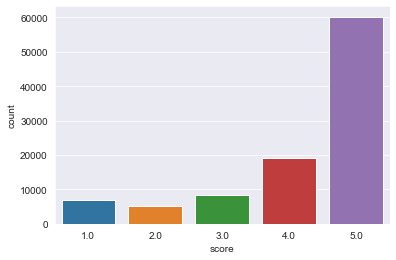

In [24]:
sns.countplot(x="score", data=books_data)

In [25]:
X_balanced, y_balanced = preprocessing.under_sample(np.array(books_data.text).reshape(-1, 1), books_data.score)
X_balanced = [sent[0] for sent in X_balanced]

<AxesSubplot: xlabel='score', ylabel='count'>

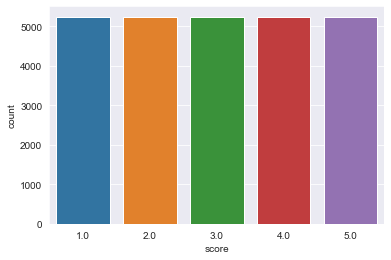

In [26]:
sns.countplot(x="score", data=pd.DataFrame(y_balanced))

In [27]:
X_tokenized = preprocessing.tokenize(X_balanced)

In [29]:
vocab = set([word for sent in X_tokenized for word in sent])
word_index = {}
index = 1
for word in vocab:
    word_index[word] = index
    index += 1

In [31]:
X_indexed = [[word_index[word] for word in sent] for sent in X_tokenized]

In [32]:
X_padded = preprocessing.nn_pad(X_indexed, None)

In [33]:
y_one_hot = preprocessing.one_hot_encode(y_balanced)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_one_hot, test_size=0.20, random_state=42)

In [35]:
embeddings_matrix = preprocessing.create_embeddings_matrix(word_index)
embeddings_matrix.shape

(107670, 300)

In [36]:
model = Sequential()

embedding_layer = Embedding(
    len(vocab) + 1,
    embeddings_matrix.shape[1],
    weights=[embeddings_matrix],
    input_length=len(X_padded[0]),
    trainable=False
)
model.add(embedding_layer)

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 2188, 300)         32301000  
                                                                 
 flatten_1 (Flatten)         (None, 656400)            0         
                                                                 
 dense_3 (Dense)             (None, 32)                21004832  
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 5)                 165       
                                                                 
Total params: 53,307,053
Trainable params: 21,006,053
Non-trainable params: 32,301,000
_________________________________________________________________
None


In [ ]:
BATCH_SIZE = 1024
EPOCHS = 8

history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1, validation_split=0.2)

Epoch 1/8


In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
# Create a grouped bar chart, with job as the x-axis
# and gender as the variable we're grouping on so there
# are two bars per job.
fig, ax = plt.subplots()

# Our x-axis. We basically just want a list
# of numbers from zero with a value for each
# of our jobs.
xs = np.arange(2)

# Define bar width. We need this to offset the second bar.
bar_width = 0.4

b1 = ax.bar(xs, [0.55, 0.39], width=bar_width, label='Naive Bayes')
# Same thing, but offset the x.
b2 = ax.bar(xs + bar_width, [0.56, 0.33], width=bar_width, label='Neural Network')

# Fix the x-axes.
ax.set_xticks(xs + bar_width / 2)
ax.set_xticklabels(["Unbalanced", "Balanced"])

# Add legend.
ax.legend()

# Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add axis and chart labels.
ax.set_ylabel('Accuracy', labelpad=15)
ax.set_title('Model accuracies', pad=15)

fig.tight_layout()